In [1]:
!pip install pandas

In [2]:
!pip install matplotlib

In [3]:
!pip install seaborn

In [4]:
!pip install numpy

In [6]:
import pandas as pd
import calendar
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


In [7]:
df = pd.read_csv("sabanciwdata_converted.csv")
df.head(4152)

,Time,Temp,Dwpt,Rhum,Prcp,Wdir,Wspd,Pres,Tsun,Coco
0,7/1/2024 0:00,20.9,19.2,90,0.0,50,13.0,1012.8,0,1
1,7/1/2024 1:00,20.0,19.0,94,0.0,60,14.8,1012.0,0,2
2,7/1/2024 2:00,20.0,19.0,94,0.0,60,11.2,1013.0,0,5
3,7/1/2024 3:00,19.1,18.3,95,0.0,50,13.0,1012.7,0,5
4,7/1/2024 4:00,20.0,19.0,94,0.0,50,13.0,1013.0,0,5
...,...,...,...,...,...,...,...,...,...,...
4147,12/20/2024 19:00,12.0,4.0,58,0.0,200,6.0,1010.0,0,3
4148,12/20/2024 20:00,12.0,4.9,62,0.0,240,6.0,1010.0,0,3
4149,12/20/2024 21:00,13.0,4.9,58,0.0,200,7.0,1010.0,0,3
4150,12/20/2024 22:00,12.0,4.9,62,0.0,210,6.0,1010.0,0,3


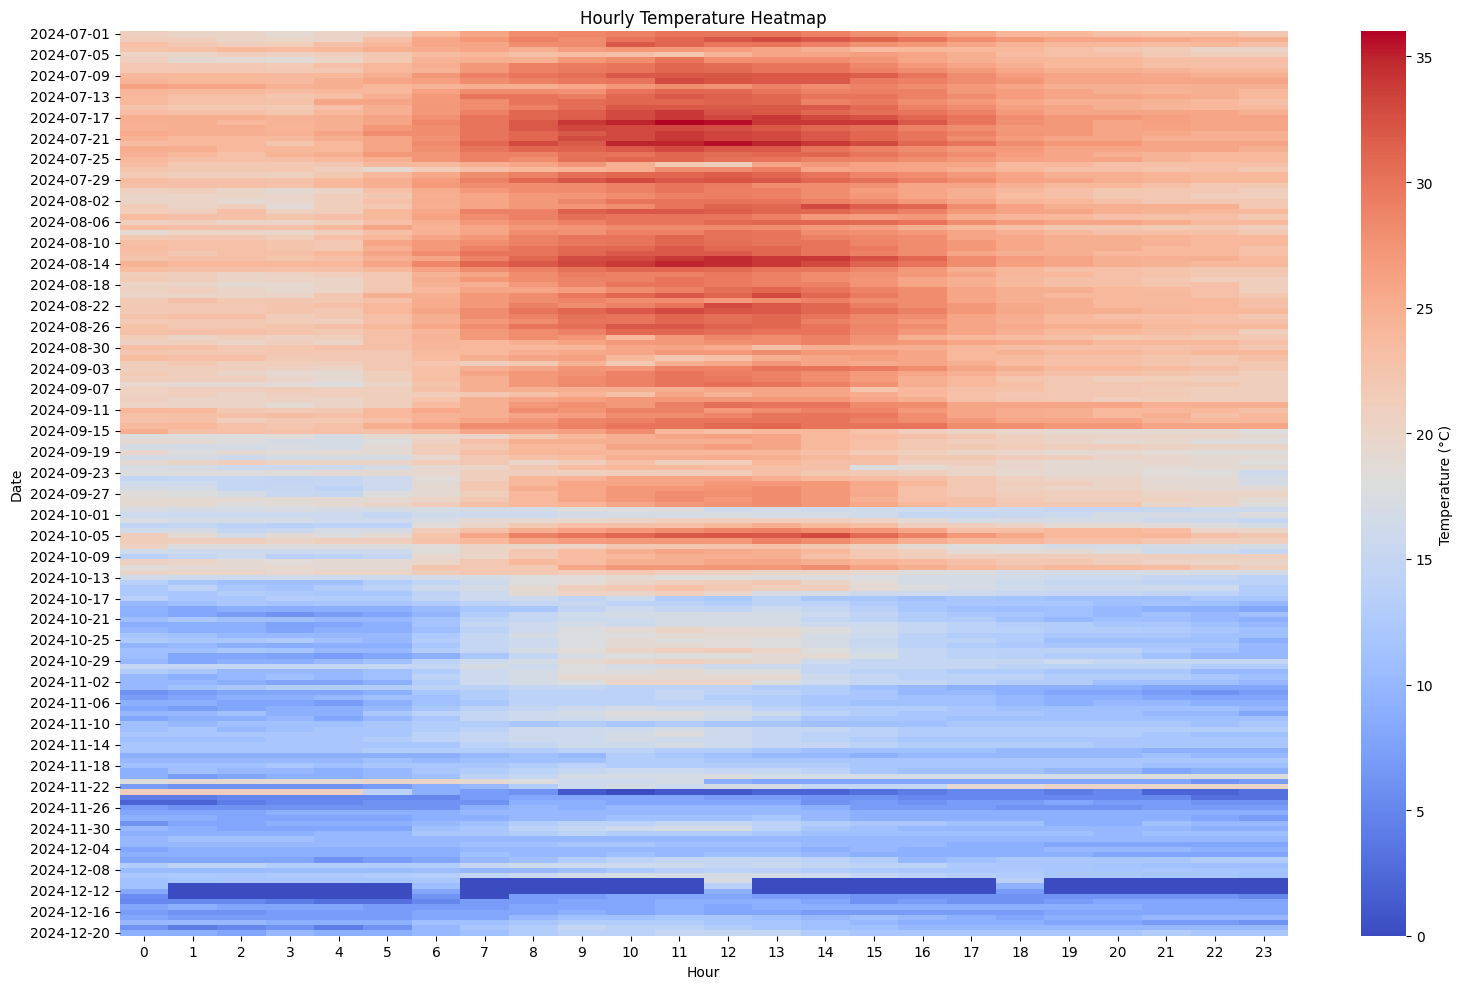

In [8]:
# Convert 'Time' to datetime
df['Time'] = pd.to_datetime(df['Time'])

# Extract Date and Hour
df['Date'] = df['Time'].dt.date
df['Hour'] = df['Time'].dt.hour

# Pivot table for hourly temperatures
hourly_pivot = df.pivot_table(values='Temp', index='Date', columns='Hour', aggfunc='mean')

# Plot heatmap
plt.figure(figsize=(16, 10))
sns.heatmap(hourly_pivot, cmap='coolwarm', cbar_kws={'label': 'Temperature (°C)'})
plt.title('Hourly Temperature Heatmap')
plt.xlabel('Hour')
plt.ylabel('Date')
plt.tight_layout()
plt.show()


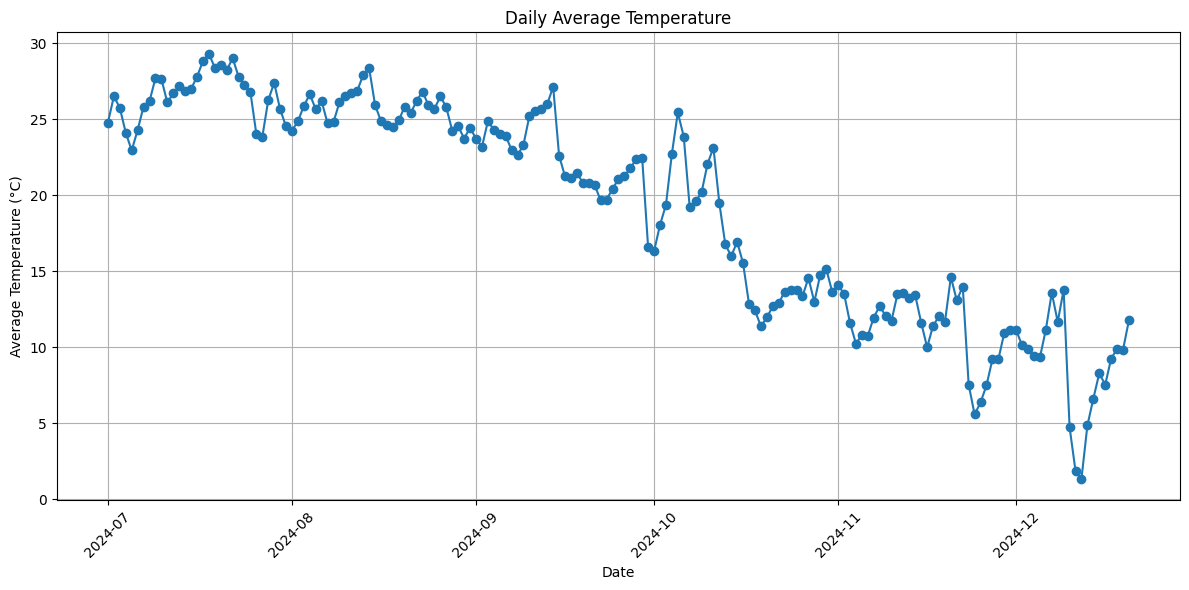

In [9]:

# Convert 'Time' column to datetime
df['Time'] = pd.to_datetime(df['Time'])

# Extract the date part for grouping
df['Date'] = df['Time'].dt.date

# Calculate daily average temperature
daily_avg_temp = df.groupby('Date')['Temp'].mean().reset_index()

# Plot daily average temperature
plt.figure(figsize=(12, 6))
plt.plot(daily_avg_temp['Date'], daily_avg_temp['Temp'], marker='o', linestyle='-')
plt.title('Daily Average Temperature')
plt.xlabel('Date')
plt.ylabel('Average Temperature (°C)')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

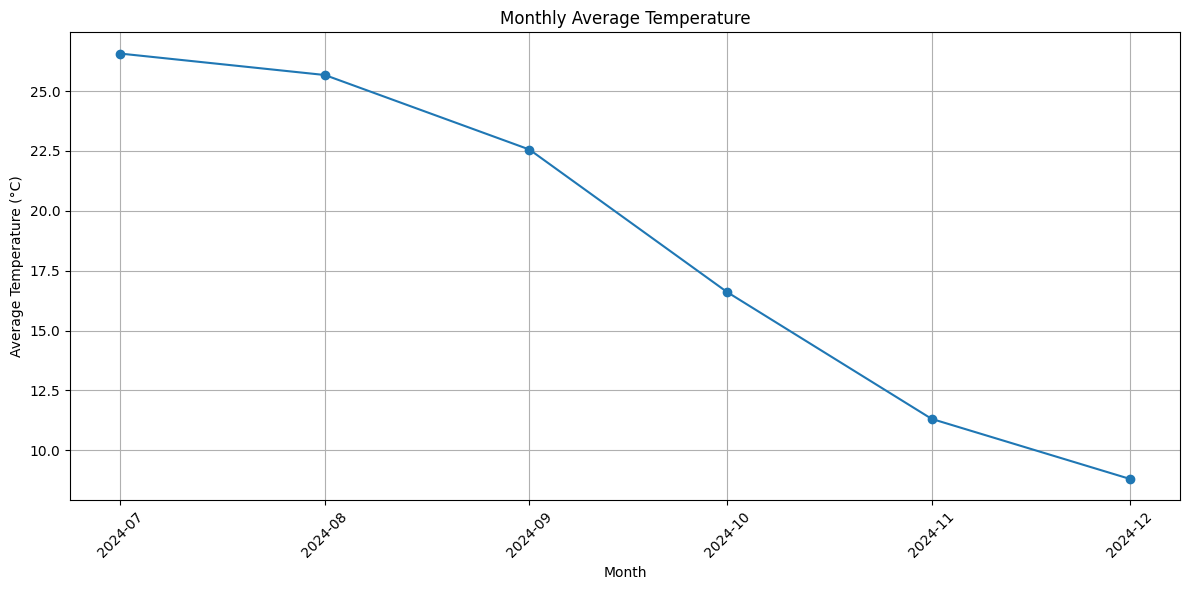

In [10]:
# Convert 'Time' or equivalent column to datetime format
df['Time'] = pd.to_datetime(df['Time'])

# Extract the month for grouping
df['Month'] = df['Time'].dt.to_period('M')

# Calculate monthly average temperature
monthly_avg_temp = df.groupby('Month')['Temp'].mean().reset_index()

# Convert 'Month' back to timestamp for better plotting
monthly_avg_temp['Month'] = monthly_avg_temp['Month'].dt.to_timestamp()

# Plot monthly average temperature
plt.figure(figsize=(12, 6))
plt.plot(monthly_avg_temp['Month'], monthly_avg_temp['Temp'], marker='o', linestyle='-')
plt.title('Monthly Average Temperature')
plt.xlabel('Month')
plt.ylabel('Average Temperature (°C)')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

In [11]:
!pip install statsmodels

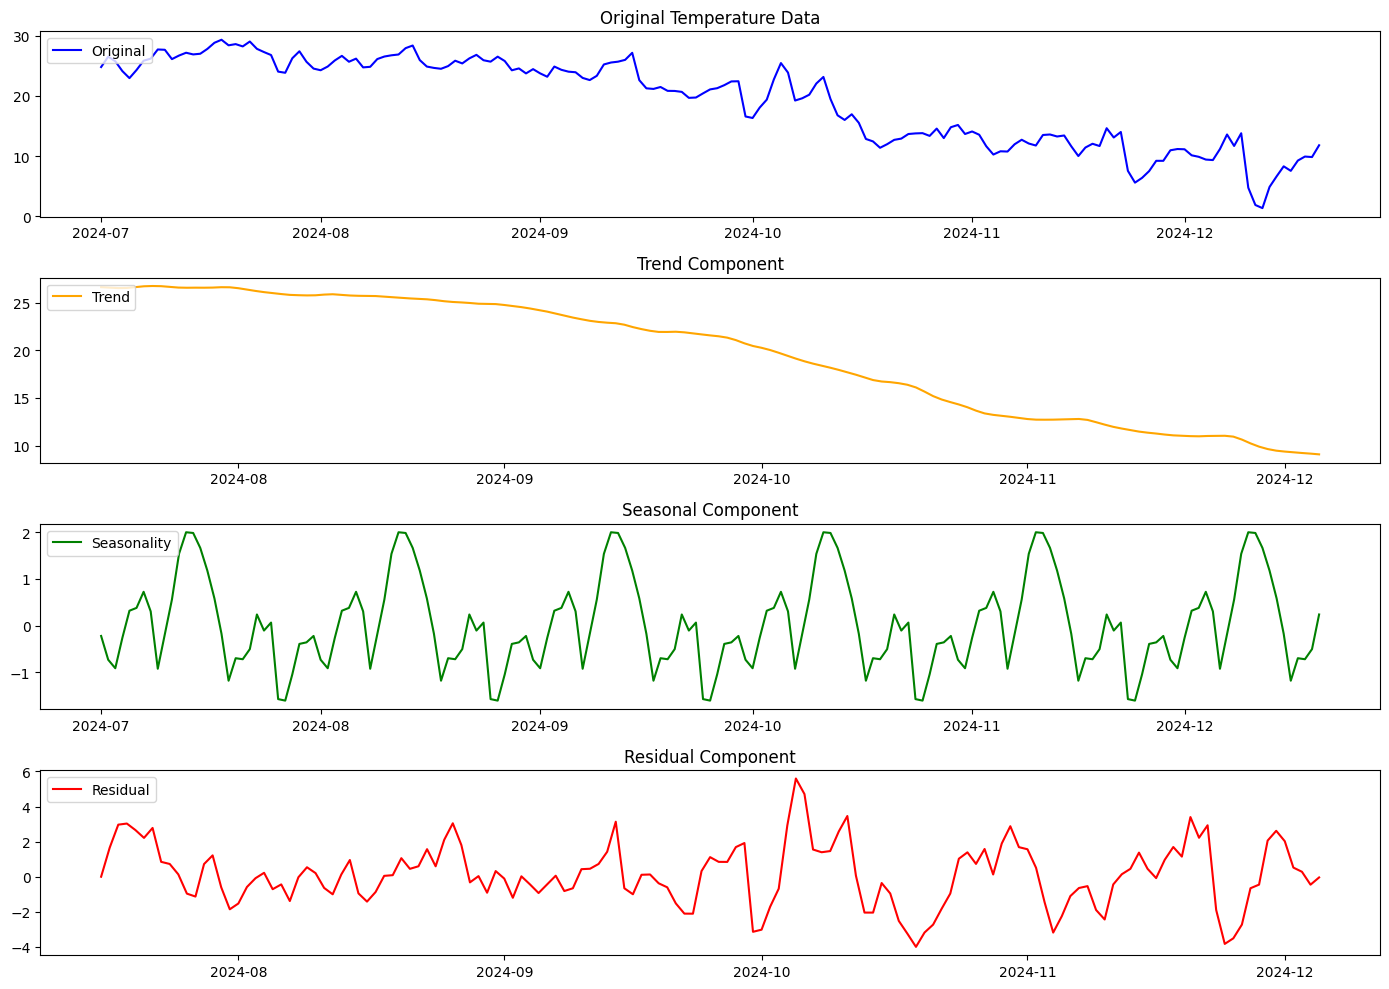

In [12]:
from statsmodels.tsa.seasonal import seasonal_decompose
df['Time'] = pd.to_datetime(df['Time'])

# Step 3: Set the 'Time' column as the index for time-series analysis
df.set_index('Time', inplace=True)

# Step 4: Resample the data to get daily average temperatures
daily_avg_temp = df['Temp'].resample('D').mean()

# Step 5: Perform decomposition (additive model, assuming monthly seasonality)
decomposition = seasonal_decompose(daily_avg_temp, model='additive', period=30)

# Step 6: Plot the decomposed components
plt.figure(figsize=(14, 10))

# Original data
plt.subplot(411)
plt.plot(daily_avg_temp, label='Original', color='blue')
plt.title('Original Temperature Data')
plt.legend(loc='upper left')

# Trend
plt.subplot(412)
plt.plot(decomposition.trend, label='Trend', color='orange')
plt.title('Trend Component')
plt.legend(loc='upper left')

# Seasonal
plt.subplot(413)
plt.plot(decomposition.seasonal, label='Seasonality', color='green')
plt.title('Seasonal Component')
plt.legend(loc='upper left')

# Residual
plt.subplot(414)
plt.plot(decomposition.resid, label='Residual', color='red')
plt.title('Residual Component')
plt.legend(loc='upper left')

plt.tight_layout()
plt.show()

In [13]:
print("Summary Statistics:")
print(df['Temp'].describe())

Summary Statistics:
count    4152.000000
mean       19.225843
std         7.678089
min         0.000000
25%        12.000000
50%        20.900000
75%        25.000000
max        36.000000
Name: Temp, dtype: float64


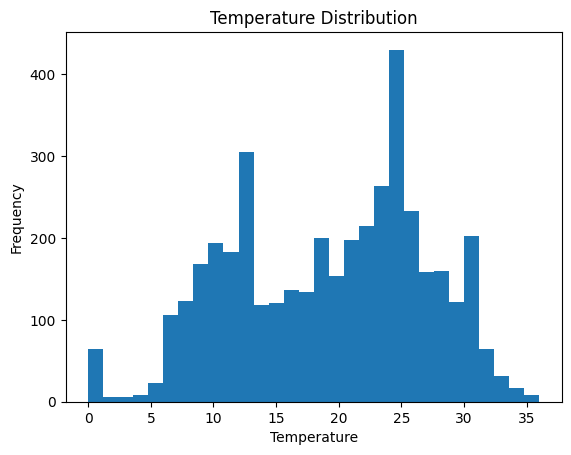

In [14]:
df['Temp'].plot(kind='hist', bins=30, title='Temperature Distribution')
plt.xlabel('Temperature')
plt.show()

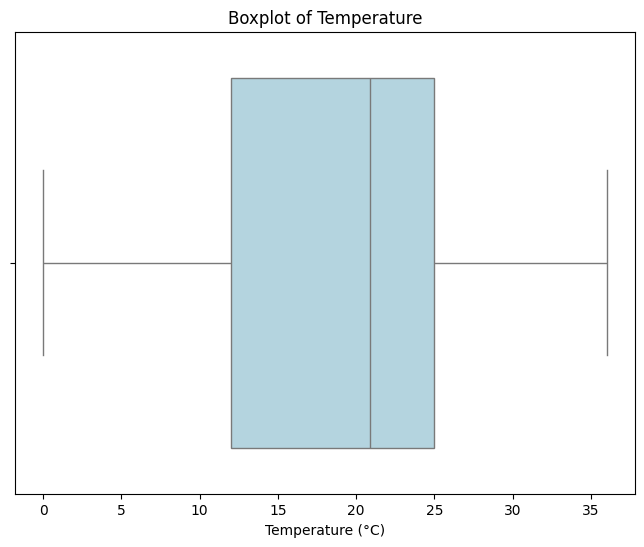

In [15]:
# Boxplot visualization
plt.figure(figsize=(8, 6))
sns.boxplot(x=df['Temp'], color='lightblue')
plt.title('Boxplot of Temperature')
plt.xlabel('Temperature (°C)')
plt.show()

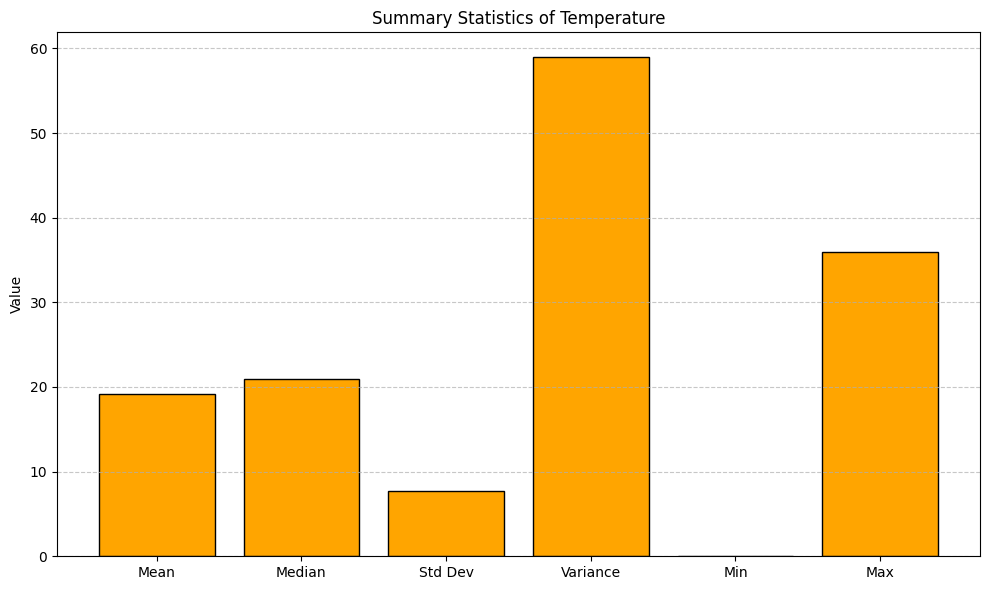

In [19]:
import matplotlib.pyplot as plt

# Statistical measures for temperature
temp_stats = {
    "Mean": df['Temp'].mean(),
    "Median": df['Temp'].median(),
    "Std Dev": df['Temp'].std(),
    "Variance": df['Temp'].var(),
    "Min": df['Temp'].min(),
    "Max": df['Temp'].max()
}

# Prepare data for visualization
statistics = list(temp_stats.keys())
values = list(temp_stats.values())

# Plot bar chart
plt.figure(figsize=(10, 6))
plt.bar(statistics, values, color='orange', edgecolor='black')
plt.title('Summary Statistics of Temperature')
plt.ylabel('Value')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


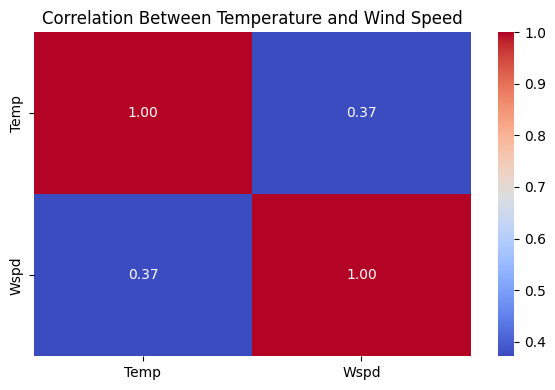

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

# Visualize the correlation between temperature and wind speed using a heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(df[['Temp', 'Wspd']].corr(), annot=True, fmt='.2f', cmap='coolwarm', cbar=True)
plt.title('Correlation Between Temperature and Wind Speed')
plt.tight_layout()
plt.show()